In [109]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression

df_bikes = pd.read_csv('data/df_bikes.csv',index_col=0)
df_fsq = pd.read_csv('data/fsq_results.csv',index_col=0)
df_fsq_unique = pd.read_csv('data/fsq_unique.csv',index_col=0)
df_yelp = pd.read_csv('data/yelp_results.csv',index_col=0)
df_yelp_unique = pd.read_csv('data/yelp_unique.csv',index_col=0)

Build a regression model.

In [144]:
import seaborn as sns

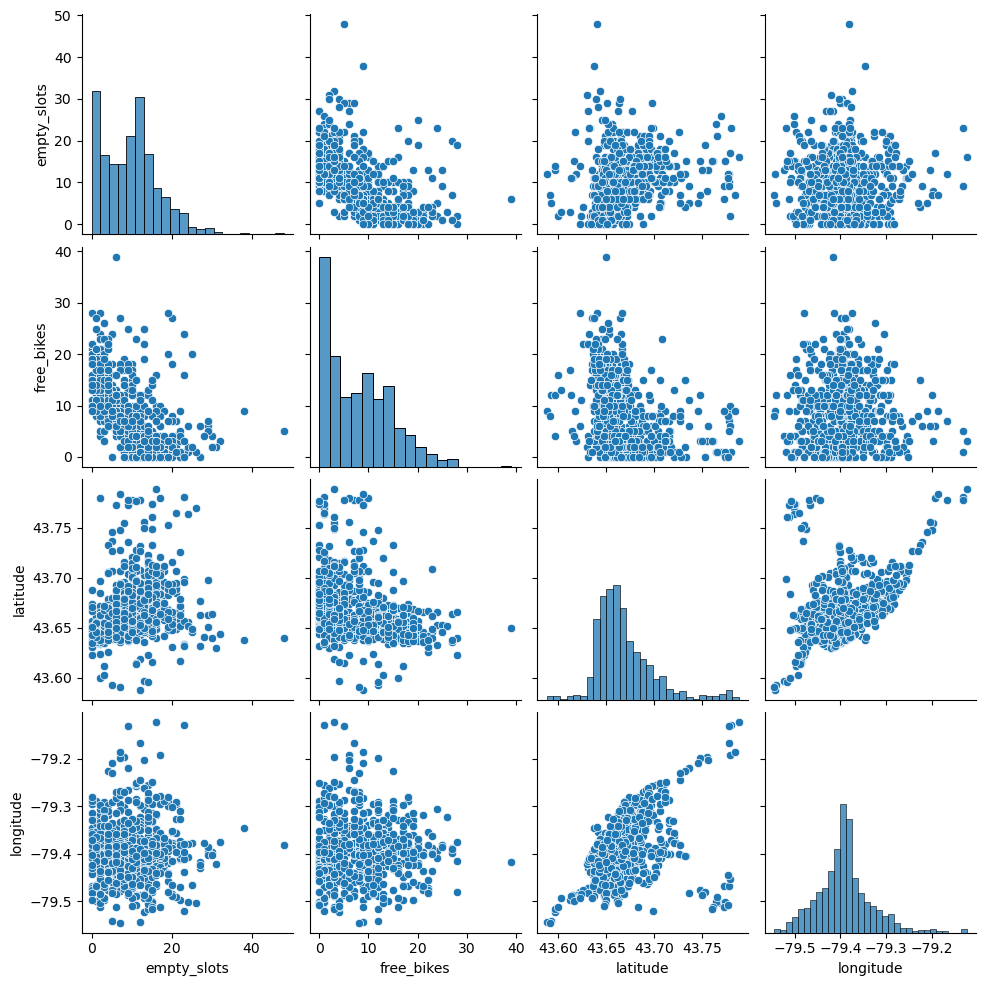

In [146]:
sns.pairplot(df_bikes)
plt.show()

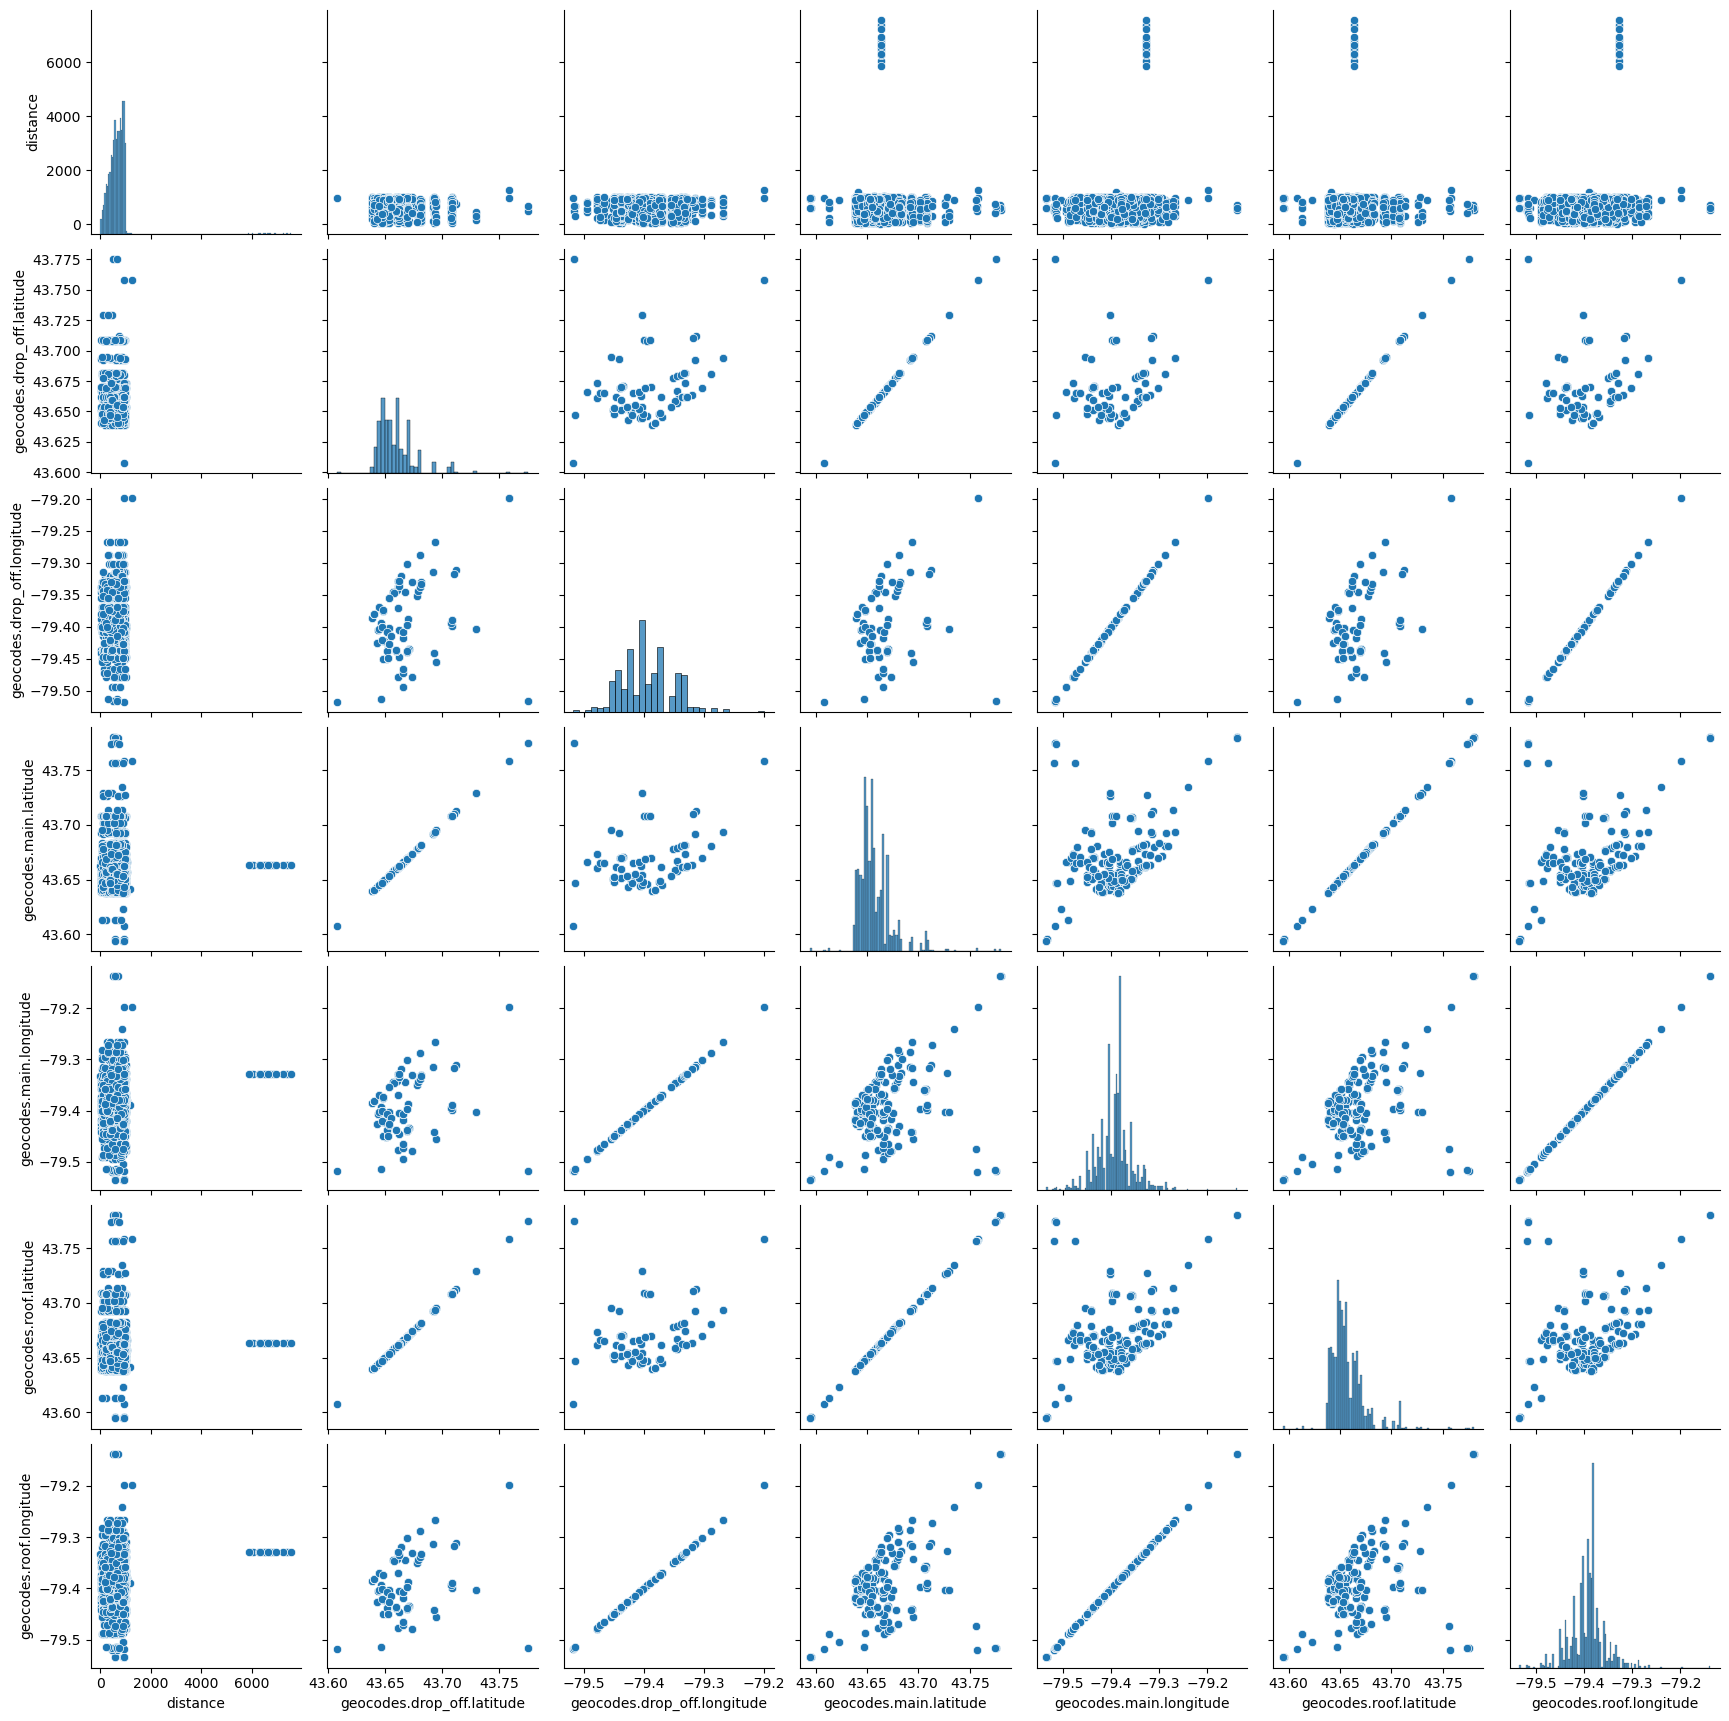

In [153]:
sns.pairplot(df_fsq)
plt.show()

In [151]:
df_fsq_unique = df_fsq_unique[df_fsq_unique['distance']<1000]

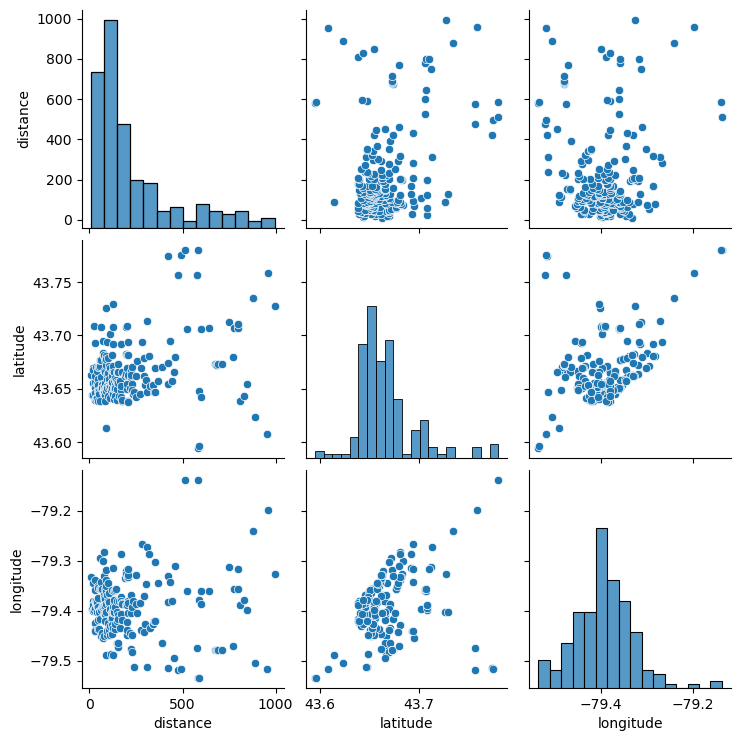

In [152]:
sns.pairplot(df_fsq_unique)
plt.show()

In [ ]:
sns.pairplot(df_yelp)
plt.show()

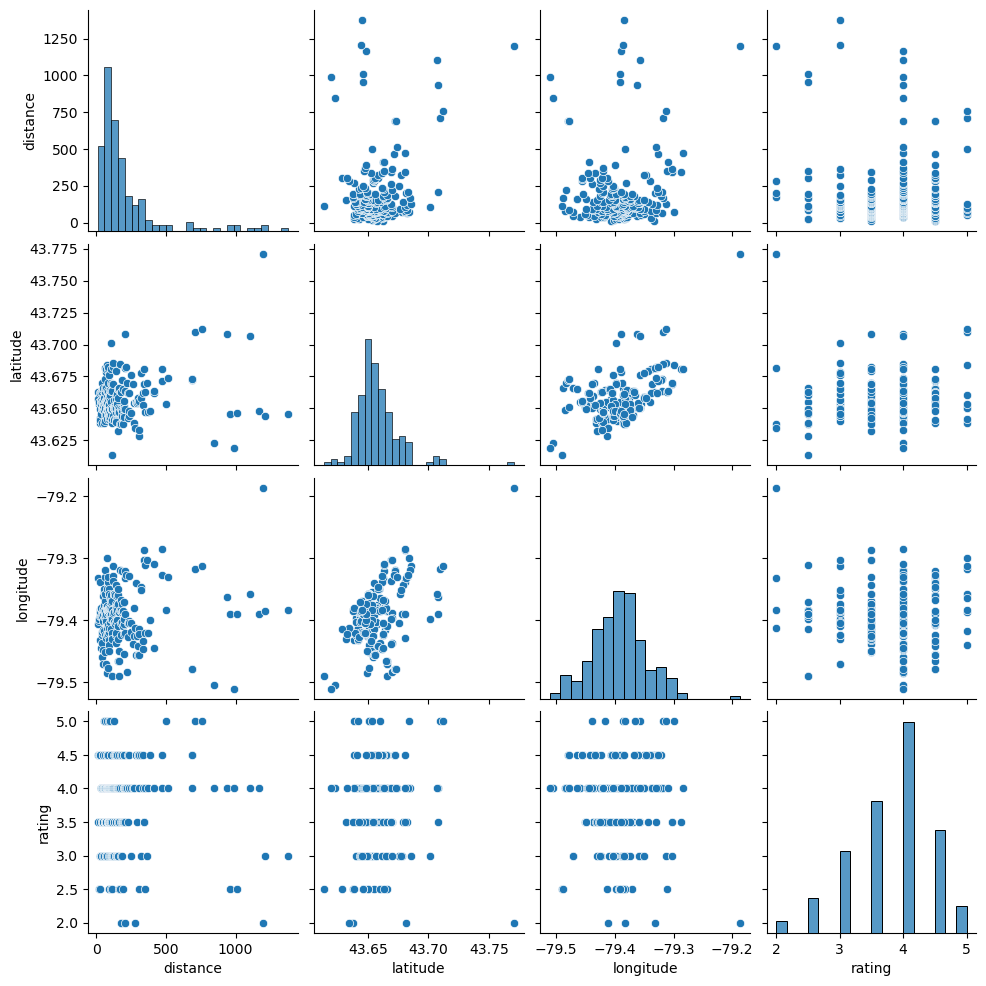

In [145]:
sns.pairplot(df_yelp_unique)
plt.show()

In [27]:
X = df_yelp_unique['distance']
y = df_yelp_unique['rating']
df_yelp_unique.head()

name  \
0      Radical Road Brewing   
1  Cloak & Dagger Irish Pub   
2              Grey Gardens   
3          LCBO - Chinatown   
4            The Black Bull   

                                          categories   distance   latitude  \
0  [{'alias': 'breweries', 'title': 'Breweries'},...   9.369660  43.662633   
1               [{'alias': 'pubs', 'title': 'Pubs'}]  13.627566  43.657140   
2  [{'alias': 'wine_bars', 'title': 'Wine Bars'},...  16.644362  43.653800   
3  [{'alias': 'beer_and_wine', 'title': 'Beer, Wi...  21.358570  43.654850   
4               [{'alias': 'bars', 'title': 'Bars'}]  24.343516  43.649750   

   longitude              address  rating  
0 -79.332479  1177 Queen Street E     4.5  
1 -79.405710   394 College Street     3.5  
2 -79.401430   199 Augusta Avenue     4.5  
3 -79.398280      335 Spadina Ave     2.5  
4 -79.393290   298 Queen Street W     2.5

In [74]:
df_join = pd.concat([df_yelp_unique,df_fsq_unique])
df_join = df_join.drop_duplicates('address')
df_join = df_join.dropna()
df_join

name  \
0        Radical Road Brewing   
1    Cloak & Dagger Irish Pub   
2                Grey Gardens   
3            LCBO - Chinatown   
4              The Black Bull   
..                        ...   
200         Amsterdam Brewery   
201       Melrose On Adelaide   
202                      LCBO   
203    Azure Restaurant & Bar   
204              Jack Astor's   

                                            categories     distance  \
0    [{'alias': 'breweries', 'title': 'Breweries'},...     9.369660   
1                 [{'alias': 'pubs', 'title': 'Pubs'}]    13.627566   
2    [{'alias': 'wine_bars', 'title': 'Wine Bars'},...    16.644362   
3    [{'alias': 'beer_and_wine', 'title': 'Beer, Wi...    21.358570   
4                 [{'alias': 'bars', 'title': 'Bars'}]    24.343516   
..                                                 ...          ...   
200     [{'alias': 'breweries', 'title': 'Breweries'}]  1105.246276   
201  [{'alias': 'cocktailbars', 'title': 'Cocktail ...  1164.661372   
202  [{'alias': 'beer_and_wine', 'title': 'Beer, Wi...  1198.220919   
203  [{'alias': 'newcanadian', 'title': 'Canadian (...  1209.903290   
204  [{'alias': 'newcanadian', 'title': 'Canadian (...  1376.910497   

      latitude  longitude                      address  rating  
0    43.662633 -79.332479          1177 Queen Street E     4.5  
1    43.657140 -79.405710           394 College Street     3.5  
2    43.653800 -79.401430           199 Augusta Avenue     4.5  
3    43.654850 -79.398280              335 Spadina Ave     2.5  
4    43.649750 -79.393290           298 Queen Street W     2.5  
..         ...        ...                          ...     ...  
200  43.707033 -79.357319               45 Esandar Dr.     4.0  
201  43.648150 -79.389880  300 - 270 Adelaide Strret W     4.0  
202  43.771085 -79.186102             4525 Kingston Rd     2.0  
203  43.644259 -79.385266           225 Front Street W     3.0  
204  43.645404 -79.383916        144 Front Street West     3.0  

[198 rows x 7 columns]

Provide model output and an interpretation of the results. 

In [88]:
name_lens = []
for name in df_join['name']:
    length = len(name)
    name_lens.append(length)
df_join['name_length'] = name_lens

X = df_join['distance']
y = df_join['rating']

In [89]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6763
Date:                Wed, 13 Sep 2023   Prob (F-statistic):              0.412
Time:                        00:33:55   Log-Likelihood:                -192.50
No. Observations:                 198   AIC:                             389.0
Df Residuals:                     196   BIC:                             395.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7646      0.060     62.473      0.000       3.646       3.883
distance      -0.0002      0.000     -0.822      0.412      -0.001       0.000
==============================================================================
Omnibus:                        6.767   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.962
Skew:                          -0.456   Prob(JB):                       0.0308
Kurtosis:                       2.895   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is there a correlation between longitude and rating?

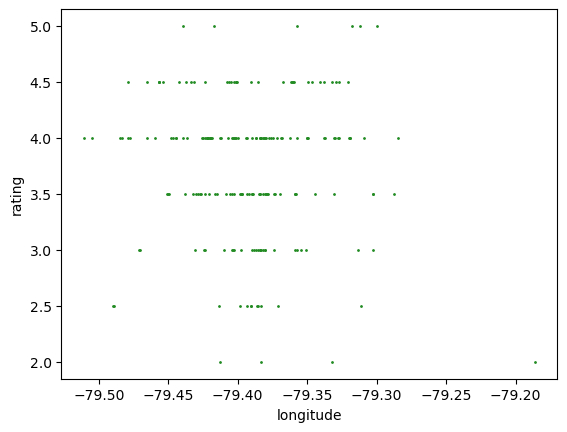

In [96]:
import matplotlib.pyplot as plt

x = [df_join['longitude']]
y = [df_join['rating']]

plt.scatter(x,y,c='forestgreen',marker='o',s=1)

plt.xlabel('longitude')
plt.ylabel('rating')

plt.show()

Is there a correlation between latitude and rating?

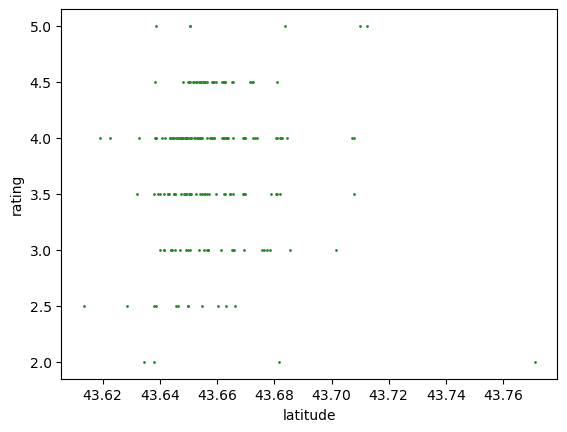

In [98]:
x = [df_join['latitude']]
y = [df_join['rating']]

plt.scatter(x,y,c='forestgreen',marker='o',s=1)

plt.xlabel('latitude')
plt.ylabel('rating')

plt.show()

Is there a correlation between lat/long and rating?

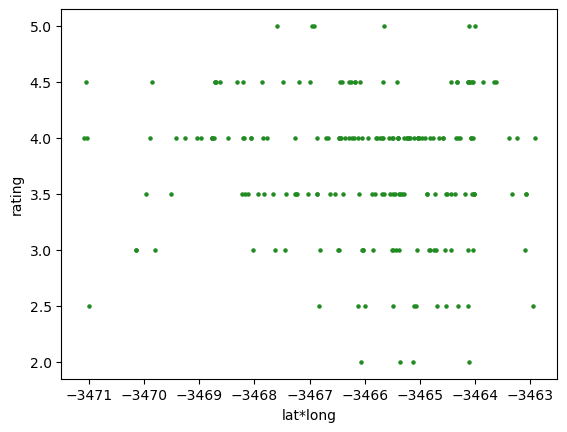

In [100]:
x = [df_join['latitude']*df_join['longitude']]
y = [df_join['rating']]

plt.scatter(x,y,c='forestgreen',marker='o',s=5)

plt.xlabel('lat*long')
plt.ylabel('rating')

plt.show()

Having found no correlation, the same question is asked of the distance to the nearest bike station for every business.

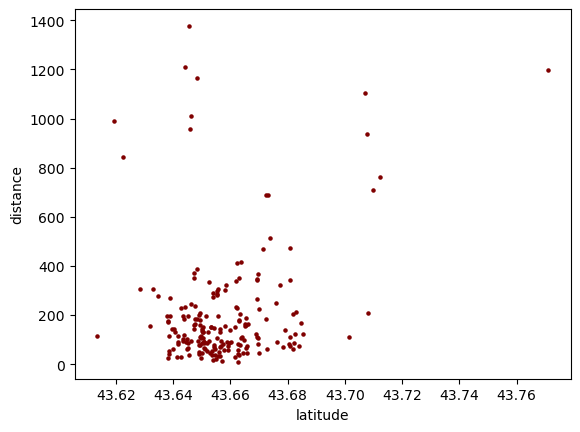

In [135]:
x = [df_join['latitude']]
y = [df_join['distance']]

plt.scatter(x,y,c='maroon',marker='o',s=5)

plt.xlabel('latitude')
plt.ylabel('distance')

plt.show()

In [136]:
x = np.array(x).reshape((-1,1))
y = np.array(y[0])
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
r_sq

0.05573567919322253

In [137]:
f'intercept:{model.intercept_}, slope:{model.coef_}'

'intercept:-140516.78080602345, slope:[3223.33784769]'

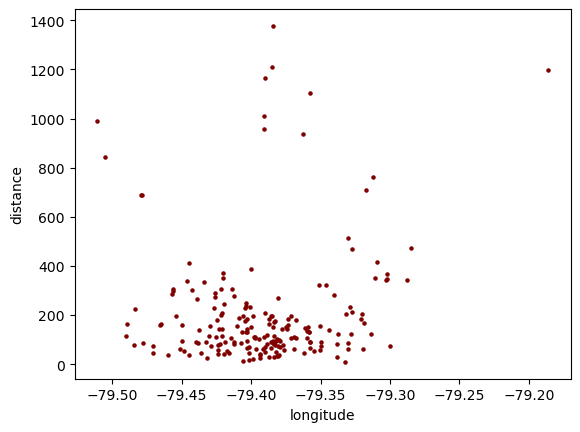

In [138]:
x = [df_join['longitude']]
y = [df_join['distance']]

plt.scatter(x,y,c='maroon',marker='o',s=5)

plt.xlabel('longitude')
plt.ylabel('distance')

plt.show()

In [139]:
x = np.array(x).reshape((-1,1))
y = np.array(y[0])
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
r_sq

0.010857461635548238

In [140]:
f'intercept:{model.intercept_}, slope:{model.coef_}'

'intercept:42850.15903187553, slope:[537.12824297]'

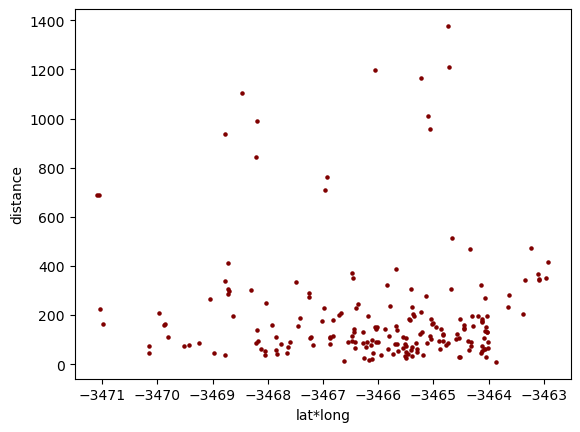

In [141]:
x = [df_join['latitude']*df_join['longitude']]
y = [df_join['distance']]

plt.scatter(x,y,c='maroon',marker='o',s=5)

plt.xlabel('lat*long')
plt.ylabel('distance')

plt.show()

In [142]:
x = np.array(x).reshape((-1,1))
y = np.array(y[0])
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
r_sq

0.004222216801868961

In [143]:
f'intercept:{model.intercept_}, slope:{model.coef_}'

'intercept:-29827.841604466652, slope:[-8.66530241]'

# Stretch

How can you turn the regression model into a classification model?

Though the rating model provides a poor use case given the low likelihood of correlation, we would in theory categorize our data pairs using the distance of a given point from the line of best fit and its x value.

From visualization, there appears to be only weak correlation between location and distance as well.

A clustering algorithm, for example, may more readily identify pockets of the city with unusually high densities of bikes, well-rated restaurants, etc.